In [71]:
#imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [72]:
#definir os caminhos 
#definir train_dir test_dir valid_dir

train_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\train'
test_dir = 'C:\\Users\\rafin\OneDrive\\Área de Trabalho\\trabalho de deep\\test'
valid_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\valid'

In [73]:
# aqui ta normalizando 
img_width, img_height = 84, 84

In [74]:
# Definir tamanho do lote
batch_size = 64


In [75]:
# Gerar dados de treinamento e dividir por 255 

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input,validation_split=0.2)

In [76]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 21921 images belonging to 169 classes.


In [77]:
# Gerar dados de validação
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 5402 images belonging to 169 classes.


In [78]:
# Gerar dados de teste
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 845 images belonging to 169 classes.


In [79]:
# Construir a rede neural conv2d
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding="same", input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 84, 84, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 42, 42, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 40, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 20, 20, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 18, 18, 512)       1180160   
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 9, 512)       

In [80]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [81]:
# Treino
history = model.fit(train_generator, epochs=32, validation_data=valid_generator)

Epoch 1/32
343/343 [==============================] - 464s 1s/step - loss: 4.8771 - accuracy: 0.0293 - val_loss: 4.2347 - val_accuracy: 0.1096
Epoch 2/32
343/343 [==============================] - 501s 1s/step - loss: 4.0025 - accuracy: 0.1191 - val_loss: 3.3655 - val_accuracy: 0.2627
Epoch 3/32
343/343 [==============================] - 494s 1s/step - loss: 3.4373 - accuracy: 0.2107 - val_loss: 2.9654 - val_accuracy: 0.3423
Epoch 4/32
343/343 [==============================] - 460s 1s/step - loss: 3.0602 - accuracy: 0.2807 - val_loss: 2.6566 - val_accuracy: 0.4011
Epoch 5/32
343/343 [==============================] - 468s 1s/step - loss: 2.7522 - accuracy: 0.3327 - val_loss: 2.4492 - val_accuracy: 0.4539
Epoch 6/32
343/343 [==============================] - 471s 1s/step - loss: 2.4825 - accuracy: 0.3781 - val_loss: 2.2298 - val_accuracy: 0.4824
Epoch 7/32
343/343 [==============================] - 480s 1s/step - loss: 2.2508 - accuracy: 0.4234 - val_loss: 2.1773 - val_accuracy: 0.4974

In [82]:
#acuracia do modelo
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


14/14 [==============================] - 5s 354ms/step - loss: 7177.6284 - accuracy: 0.0805
Test accuracy: 0.08047337085008621


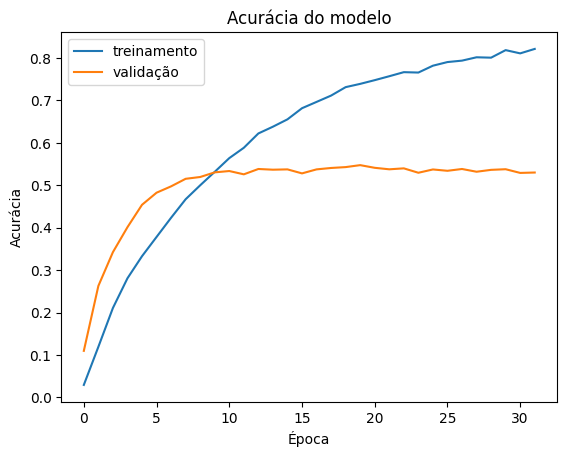

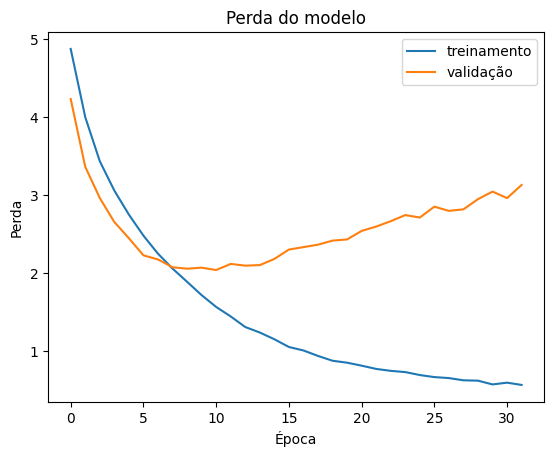

In [83]:

# Plotar gráfico de acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

# Plotar gráfico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper right')
plt.show()